<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [29]:
# Import Packages
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import sys

assert sys.version_info >= (3, 7)

In [13]:


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    data_path = Path("datasets/housing/housing.csv")
    return pd.read_csv(data_path), data_path.parent.resolve()

housing, data_directory = load_housing_data()

print(f"Data is saved in: {data_directory}")


housing , _ = load_housing_data()

Data is saved in: C:\Users\Lbundi\datasets\housing


In [15]:
# Display the first 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Exploratory Analysis 

- Is an approach to analyzing data set to summarize their main characterists , often using visual methods

EDA Involves

1. Understanding Data Structure
2. Data cleaning
   - Detect and Treat Missing Values
   - Detect and remove duplicates
   - Correcting data types
3. Descriptive Statistics
4. Data Visualization
5. Identifying Patterns and Relationships
6. Detect Outliers and Anomalies
7. Formulate Hypotheses
   - Generating hypotheses about data relationships based on observed patterns
   - Designing experiments or further analyses to test these hypotheses
8. Feature Engineering:


#### Approches of EDA

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

#### Missing Numbers

In [21]:
# Detect Missing Nos

housing.isna().sum().sort_values(ascending =False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- We have many ways to treat missing Numbers which include;
  1. Impute missing Values with
     - Mean/Median/Mode
     - Forward fill - replace missing values with the previous value in the column
     - Backward fill - replace missing values with the  next value in the column
     - Interpolate missing values
     - Using Algorithims like K-Nearest Neighbour (KNN )Imputation
     - Predictive Modelling
  2. Using Categorical Methods Fill with a Specific Value: Replace missing values with a specific value, such as 'Unknown' or 0
  3. Custom Imputation- Domain-Specific Imputation: Use knowledge about the dataset to create custom imputation strategies.


In [23]:
# To treat our missing values above we choose Imputation by Mean for simplicity purposes

# Impute by mean
housing.total_bedrooms.fillna(housing.total_bedrooms.mean(),inplace=True)

In [24]:
# Check the cardinality of `ocean_proximity`

housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

##### Univariate Analysis
1. Histogram

InvalidIndexError: (slice(None, None, None), 0)

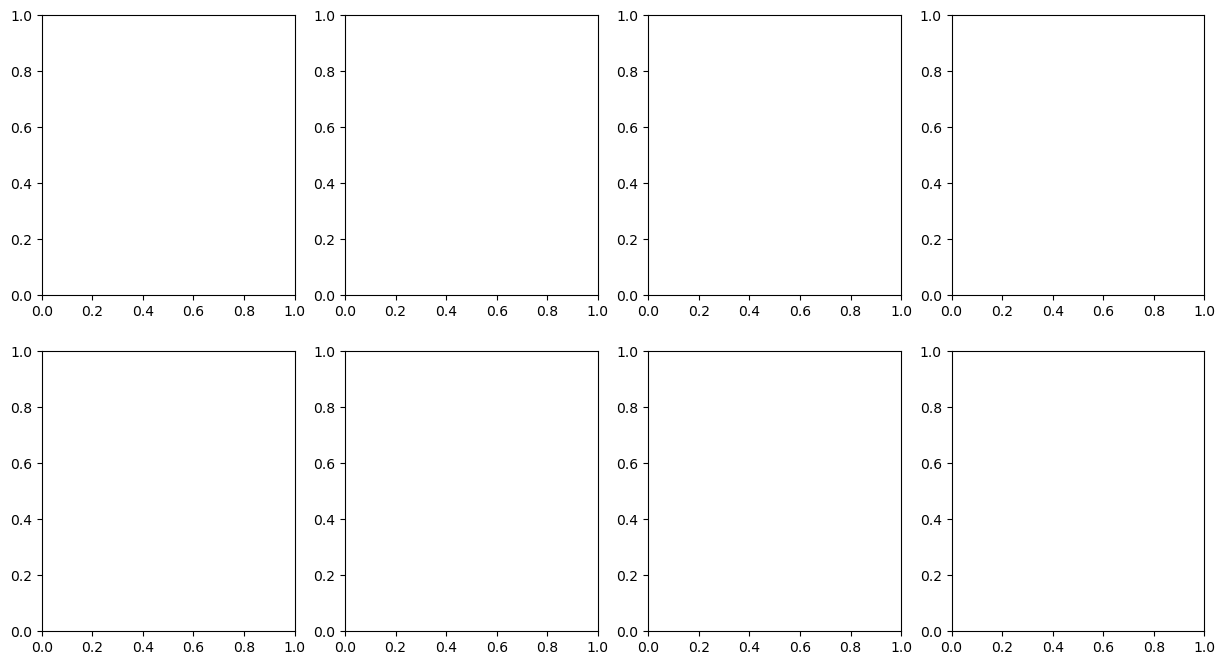

In [30]:
nrows , ncols = 2,4

fig , axes  = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

#Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(housing.shape[1]):
    axes[i].hist(housing[:,i],bins=20, alpha=0.7)
    axes[i].set_title(f'Column {i+1}')
    
plt.tight_layout()
plt.show()

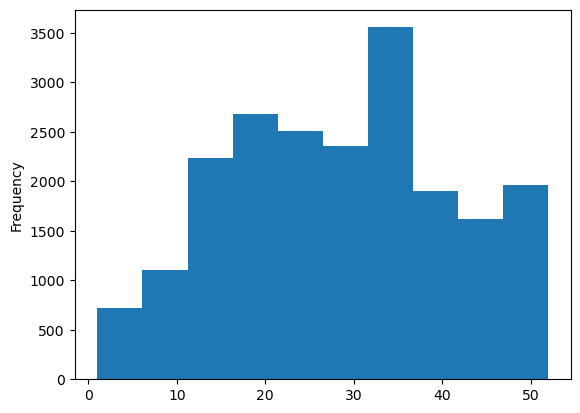

In [36]:
housing['housing_median_age'].plot(kind='hist');

In [25]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
